In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df = df.fillna(0)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
df["meal"].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [12]:
df["children"].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [13]:
df["adults"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [14]:
df["babies"].unique()

array([ 0,  1,  2, 10,  9])

In [17]:
len(df[df["adults"] == 0])

403

In [19]:
filter = (df["children"] == 0) & (df["adults"] == 0) & (df["babies"] == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [20]:
data = df[~filter]
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


Analisa 1

In [21]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [23]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [24]:
resort.shape

(28927, 32)

In [25]:
city.shape

(46084, 32)

In [32]:
labels = resort["country"].value_counts().index
values = resort["country"].value_counts()
values

country
PRT    10184
GBR     5922
ESP     3105
IRL     1734
FRA     1399
       ...  
UGA        1
COM        1
MUS        1
BIH        1
SAU        1
Name: count, Length: 119, dtype: int64

In [34]:
import plotly.graph_objs as go

trace = go.Pie(labels = labels, 
               values = values, 
               hoverinfo="label+percent", 
               textinfo = "value")

fig = go.Figure(data = [trace])
fig.update_layout(width = 400, height = 400)
fig.show()

In [40]:
wise = data[data["is_canceled"] == 0]["country"].value_counts().reset_index()
wise.columns = ["country", "no of guests"]
wise

,country,no of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [44]:
import plotly_express as px

map_guest = px.choropleth(wise, 
                          locations = wise["country"],
                          color = wise["no of guests"],
                          hover_name = wise["country"],
                          title = "Home country of guests")

map_guest.show()

Analisa 2

In [45]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [46]:
data2 = data[data["is_canceled"] == 0]
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


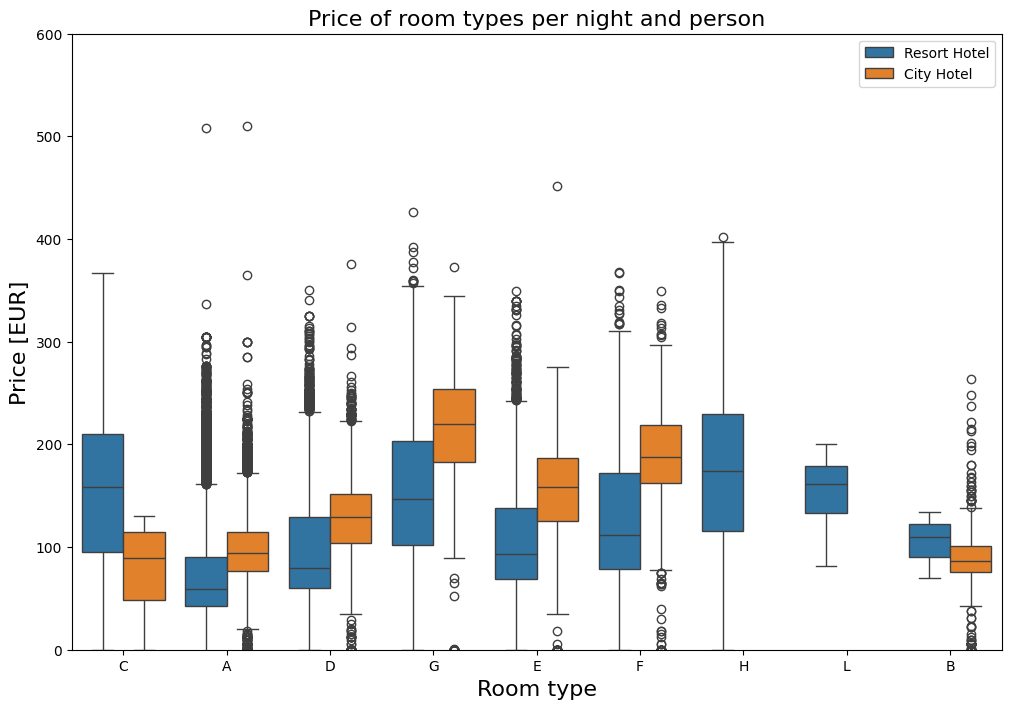

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "reserved_room_type", 
            y = "adr",
            hue = "hotel", 
            data = data2)
plt.title("Price of room types per night and person", fontsize = 16)
plt.xlabel("Room type", fontsize = 16)
plt.ylabel("Price [EUR]", fontsize = 16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

Analisa 3

In [49]:
data_resort = resort[resort["is_canceled"] == 0]
data_city = city[city["is_canceled"] == 0]

In [55]:
resort_hotel = data_resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_hotel = data_city.groupby(["arrival_date_month"])["adr"].mean().reset_index()

In [56]:
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [57]:
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [59]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")
final.columns = ["month", "price_for_resort", "price_for_city_hotel"]
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [62]:
import sort_dataframeby_monthorweek as sd 

final2 = sd.Sort_Dataframeby_Month(df = final, monthcolumnname = "month")
final2

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [63]:
px.line(final2, x = "month", y = ["price_for_resort", "price_for_city_hotel"])

In [64]:
px.line(final, x = "month", y = ["price_for_resort", "price_for_city_hotel"])

Analisa 4

In [66]:
data[["hotel", "market_segment", "stays_in_weekend_nights", "stays_in_week_nights"]]

,hotel,market_segment,stays_in_weekend_nights,stays_in_week_nights
0,Resort Hotel,Direct,0,0
1,Resort Hotel,Direct,0,0
2,Resort Hotel,Direct,0,1
3,Resort Hotel,Corporate,0,1
4,Resort Hotel,Online TA,0,2
...,...,...,...,...
119385,City Hotel,Offline TA/TO,2,5
119386,City Hotel,Online TA,2,5
119387,City Hotel,Online TA,2,5
119388,City Hotel,Online TA,2,5


<Axes: xlabel='market_segment', ylabel='stays_in_week_nights'>

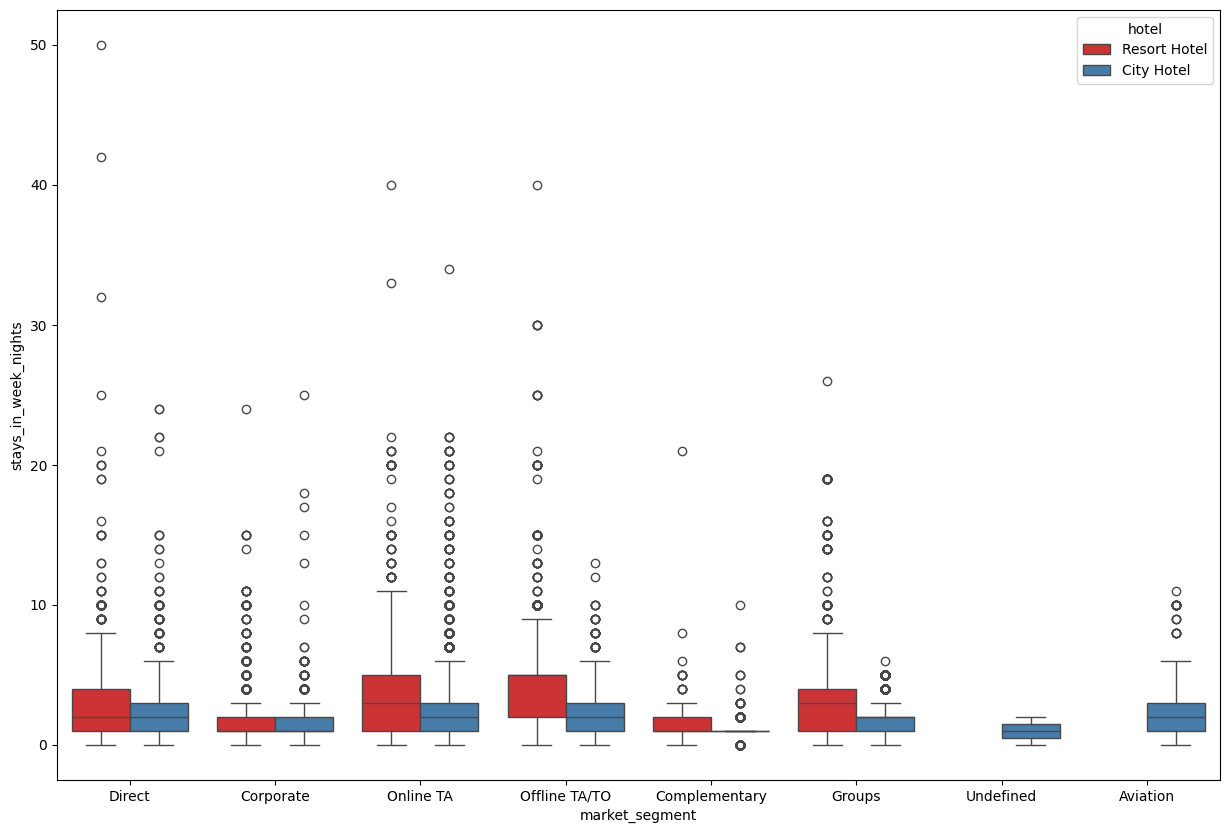

In [67]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", 
            y = "stays_in_week_nights", 
            data = data, 
            hue = "hotel", 
            palette = "Set1")

Analisa 5

<Axes: xlabel='market_segment', ylabel='adr'>

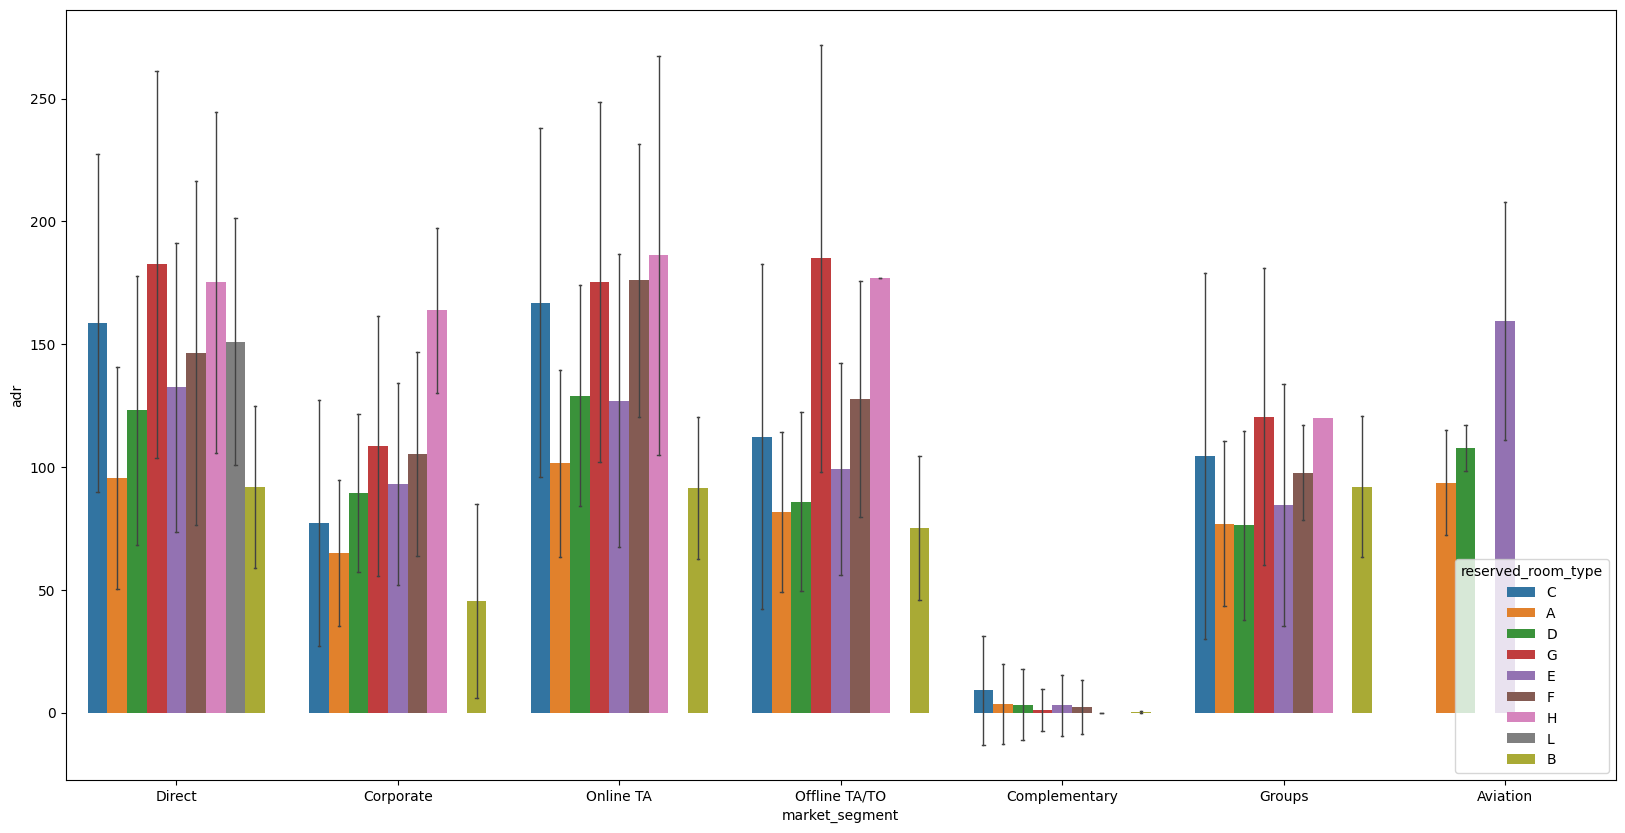

In [73]:
filter = data["is_canceled"] == 0
clean_data = data[filter]

plt.figure(figsize=(20,10))
sns.barplot(x = "market_segment",
            y = "adr", 
            hue = "reserved_room_type", 
            data = clean_data, 
            errorbar = "sd", 
            err_kws = {'linewidth': 1}, 
            capsize = 0.1)

Assignment

In [75]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

No 1

In [82]:
meal = df["meal"].value_counts()
meal = meal.drop("Undefined")
meal

meal
BB    92310
HB    14463
SC    10650
FB      798
Name: count, dtype: int64

In [83]:
import plotly.graph_objs as go

trace = go.Pie(labels = meal.index, 
               values = meal, 
               hoverinfo="label+percent", 
               textinfo = "value")

fig = go.Figure(data = [trace])
fig.update_layout(width = 400, height = 400)
fig.show()